In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
import pandas as pd
from layers import InputToCx, CxMO, FreeSpacePropagation, CxD2NNIntensity, CxD2NNMNISTDetector, ImageResize, Detector

print("TensorFlow:", tf.__version__)
print("Python:", sys.version)
print("OpenCV:", cv2.__version__)

plt.rcParams['font.size'] = 18

TensorFlow: 2.0.0
Python: 3.6.13 |Anaconda, Inc.| (default, Feb 23 2021, 12:58:59) 
[GCC Clang 10.0.0 ]
OpenCV: 3.4.2


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [3]:
shape = (28, 28)
inputs = tf.keras.Input(shape)
x = Detector(10)(inputs)

model = tf.keras.models.Model(inputs, x)
model.summary()

pred = model.predict(x_train)
pred.shape

(784, 10)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
detector_1 (Detector)        (None, 10)                0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


NameError: name 'x_train' is not defined

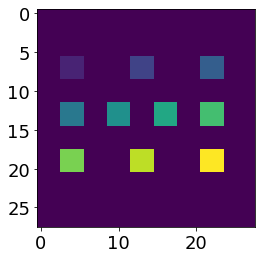

In [6]:
model.layers[-1].plot_area((28, 28))

In [6]:
inp = np.zeros((10, 28, 28))
inp[:, :, :] = 1
pred = model.predict(inp)
pred.shape

(10, 10)

<BarContainer object of 10 artists>

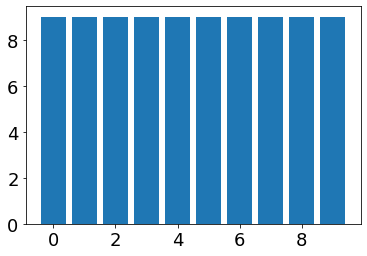

In [7]:
plt.bar(range(10), pred[0,:])

In [6]:
test = np.zeros((10, 10, 10))
w = np.zeros((10, 10, 10))
for i in range(10):
    test[i, i, i] = 1
    w[i, i, i] = 1

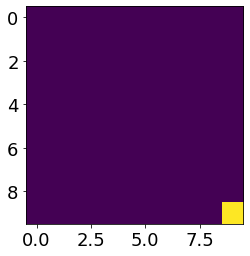

In [27]:
plt.imshow(test[9,:,:])